# Asteroid Route Optimization


In [1]:
import sys
import os
import os.path
from glob import glob
import numpy as np
import pandas as pd
# print(sys.version)
pd.show_versions()
import matplotlib.pyplot as plt
import matplotlib
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 9,
    "font.size": 8,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 6,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    # Use Type 1 fonts in plots.
    "pdf.fonttype": 42,
}
plt.rcParams.update(tex_fonts)
# Do not wrap long lines
np.set_printoptions(linewidth=np.nan)
from arp_vis import AsteroidRoutingProblem,plot_solution,get_fig_size
def plot_solution_to_pdf(instance, sol, pdf_file, title = None, figsize = "lncs"):
    fig, ax = plt.subplots(figsize=get_fig_size(figsize, fraction=1))
    ax, _ = plot_solution(instance, sol, ax = ax)
    if title:
        ax.set_title(title)
    fig.savefig(pdf_file, bbox_inches="tight")


INSTALLED VERSIONS
------------------
commit           : 945c9ed766a61c7d2c0a7cbb251b6edebf9cb7d5
python           : 3.8.10.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.8.0-41-generic
Version          : #46~20.04.1-Ubuntu SMP Mon Jan 18 17:52:23 UTC 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_GB.UTF-8
LOCALE           : en_GB.UTF-8

pandas           : 1.3.4
numpy            : 1.20.3
pytz             : 2019.3
dateutil         : 2.7.3
pip              : 20.0.2
setuptools       : 45.2.0
Cython           : 3.0a6
pytest           : 4.6.9
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.5.0
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.10.1
IPython          : 7.13.0
pandas_datareader: None
bs4              : 4.8.2
bottleneck       : None
f

In [2]:
instance = AsteroidRoutingProblem(10, 73)
path = f"./results/m1-er0/arp_{instance.n}_{instance.seed}/"
file = "greedynn-euclidean.csv.xz"
pdf = f"img/sol_greedy_{instance.n}_{instance.seed}.pdf"
greedy = pd.read_csv(path + file).loc[0,'x']
greedy = np.fromstring(greedy, dtype=int, sep=' ')
print(greedy)

[2 8 1 5 9 4 7 0 3 6]


[5.70612704e-17 2.54183704e+02 3.97178066e-17 1.37793533e+02 0.00000000e+00 1.36424609e+02 5.50119402e-16 2.25752790e+02 0.00000000e+00 2.00989673e+02 6.26248672e-14 2.48966444e+02 0.00000000e+00 2.41333816e+02 2.18114906e-19 3.42149111e+02 5.86545317e-18 3.46986465e+02 0.00000000e+00 4.87806210e+02]
0
2
Number of impulses: 2, Total cost: 43.246165 km / s
1
8
Number of impulses: 2, Total cost: 15.437189 km / s
2
1
Number of impulses: 2, Total cost: 15.265642 km / s
3
5
Number of impulses: 2, Total cost: 15.970299 km / s
4
9
Number of impulses: 2, Total cost: 17.274361 km / s
5
4
Number of impulses: 2, Total cost: 13.706657 km / s
6
7
Number of impulses: 2, Total cost: 24.750083 km / s
7
0
Number of impulses: 2, Total cost: 37.386601 km / s
8
3
Number of impulses: 2, Total cost: 21.185488 km / s
9
6
Number of impulses: 2, Total cost: 19.297108 km / s


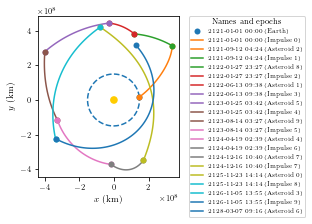

In [3]:
plot_solution_to_pdf(instance, greedy, pdf_file=pdf)

In [4]:
path = f"./results/m400-er1/arp_{instance.n}_{instance.seed}/"
file = "cego-greedy_euclidean.csv.xz"
pdf = f"img/sol_cego-greedy-er1_{instance.n}_{instance.seed}.pdf"
df = pd.read_csv(path + file)
sol = df.loc[df.Fitness.idxmin(),'x']
sol = np.fromstring(sol, dtype=int, sep=' ')
print(sol)

[0 6 3 1 4 9 5 7 8 2]


[0.00000000e+00 2.51371992e+02 1.45252993e-17 2.04378005e+02 1.83268891e-14 2.18960357e+02 3.58806668e-15 3.41165093e+02 0.00000000e+00 2.05705480e+02 5.54944455e-17 1.42443638e+02 9.41552045e-15 2.59225727e+02 0.00000000e+00 1.14671420e+02 0.00000000e+00 2.28445178e+02 1.53515015e-15 1.99335668e+02]
0
0
Number of impulses: 2, Total cost: 22.899342 km / s
1
6
Number of impulses: 2, Total cost: 24.145784 km / s
2
3
Number of impulses: 2, Total cost: 8.905217 km / s
3
1
Number of impulses: 2, Total cost: 36.174842 km / s
4
4
Number of impulses: 2, Total cost: 14.602226 km / s
5
9
Number of impulses: 2, Total cost: 19.908051 km / s
6
5
Number of impulses: 2, Total cost: 12.031853 km / s
7
7
Number of impulses: 2, Total cost: 11.892808 km / s
8
8
Number of impulses: 2, Total cost: 15.147054 km / s
9
2
Number of impulses: 2, Total cost: 14.653269 km / s


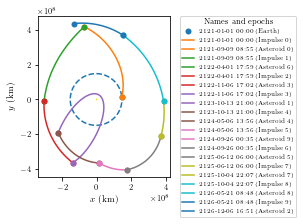

In [5]:
plot_solution_to_pdf(instance, sol, pdf_file=pdf)

In [6]:
path = f"./results/m400-er0/arp_{instance.n}_{instance.seed}/"
file = "umm-greedy_euclidean.csv.xz"
pdf = f"img/sol_umm-greedy-er0_{instance.n}_{instance.seed}.pdf"
df = pd.read_csv(path + file)
sol = df.loc[df.Fitness.idxmin(),'x']
sol = np.fromstring(sol, dtype=int, sep=' ')
print(sol)

[8 5 3 0 4 2 9 7 6 1]


[5.74569961e-17 2.80210587e+02 0.00000000e+00 2.86813872e+02 4.47923915e-17 2.69083574e+02 1.22613646e-17 4.60912609e+02 0.00000000e+00 3.50441077e+02 0.00000000e+00 2.00633852e+02 0.00000000e+00 4.00392126e+02 0.00000000e+00 2.91699767e+02 0.00000000e+00 4.45951443e+02 0.00000000e+00 5.05844061e+02]
0
8
Number of impulses: 2, Total cost: 43.457332 km / s
1
5
Number of impulses: 2, Total cost: 14.695049 km / s
2
3
Number of impulses: 2, Total cost: 63.805063 km / s
3
0
Number of impulses: 2, Total cost: 25.080785 km / s
4
4
Number of impulses: 2, Total cost: 25.729889 km / s
5
2
Number of impulses: 2, Total cost: 11.596637 km / s
6
9
Number of impulses: 2, Total cost: 20.045415 km / s
7
7
Number of impulses: 2, Total cost: 27.249223 km / s
8
6
Number of impulses: 2, Total cost: 21.551078 km / s
9
1
Number of impulses: 2, Total cost: 23.639640 km / s


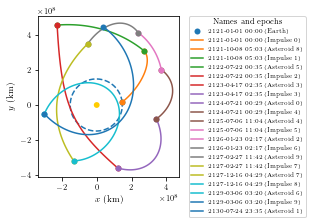

In [7]:
plot_solution_to_pdf(instance, sol, pdf_file=pdf)